[Reference](https://medium.com/@abdallahashraf90x/oversampling-for-better-machine-learning-with-imbalanced-data-68f9b5ac2696)

# Random oversampling

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")

from sklearn.datasets import make_classification


def create_dataset(
    n_samples=1000,
    weights=(0.01, 0.01, 0.98),
    n_classes=3,
    class_sep=0.8,
    n_clusters=1,
):
    return make_classification(
        n_samples=n_samples,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_repeated=0,
        n_classes=n_classes,
        n_clusters_per_class=n_clusters,
        weights=list(weights),
        class_sep=class_sep,
        random_state=0,
    )

def plot_resampling(X, y, sampler, ax, title=None):
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
    if title is None:
        title = f"Resampling with {sampler.__class__.__name__}"
    ax.set_title(title)
    sns.despine(ax=ax, offset=10)

import numpy as np


def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    if title is not None:
        ax.set_title(title)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

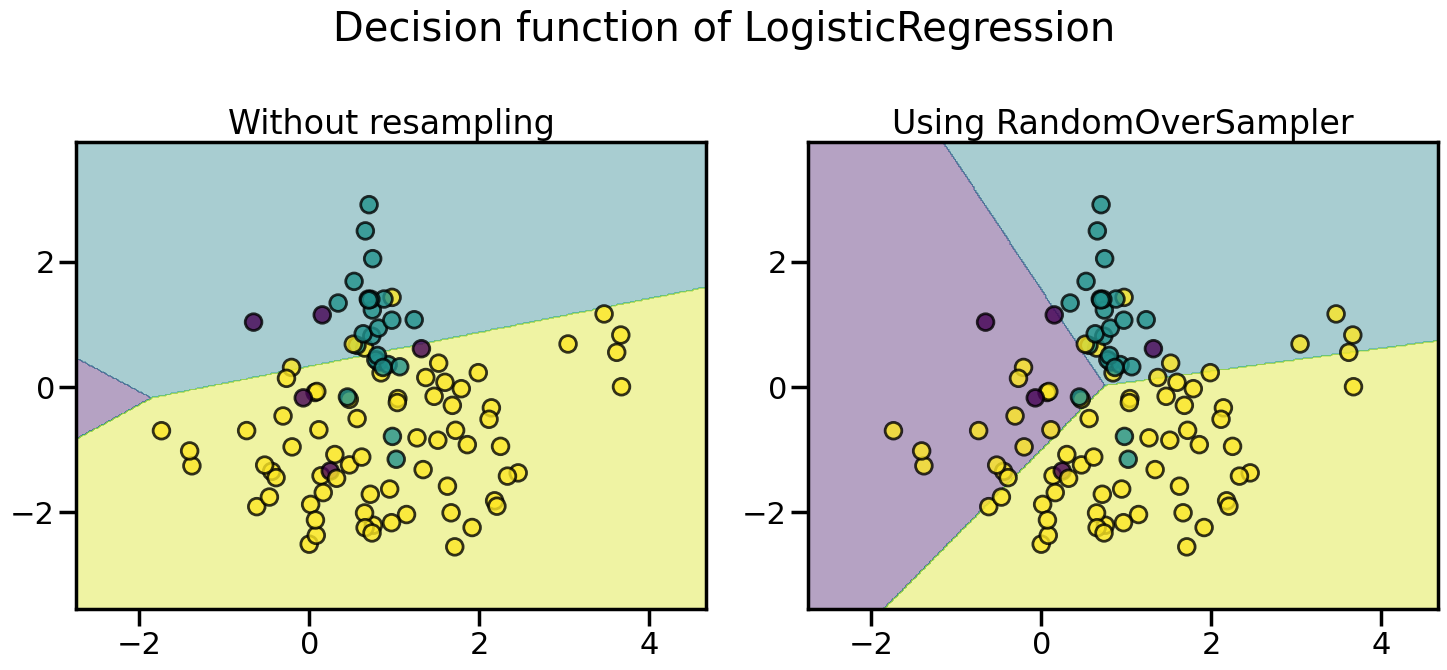

In [4]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

X, y = create_dataset(n_samples=100, weights=(0.05, 0.25, 0.7))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

clf.fit(X, y)
plot_decision_function(X, y, clf, axs[0], title="Without resampling")

sampler = RandomOverSampler(random_state=0)
model = make_pipeline(sampler, clf).fit(X, y)
plot_decision_function(X, y, model, axs[1],
                       f"Using {model[0].__class__.__name__}")

fig.suptitle(f"Decision function of {clf.__class__.__name__}")
fig.tight_layout()

#  Smoothed bootstrap oversampling

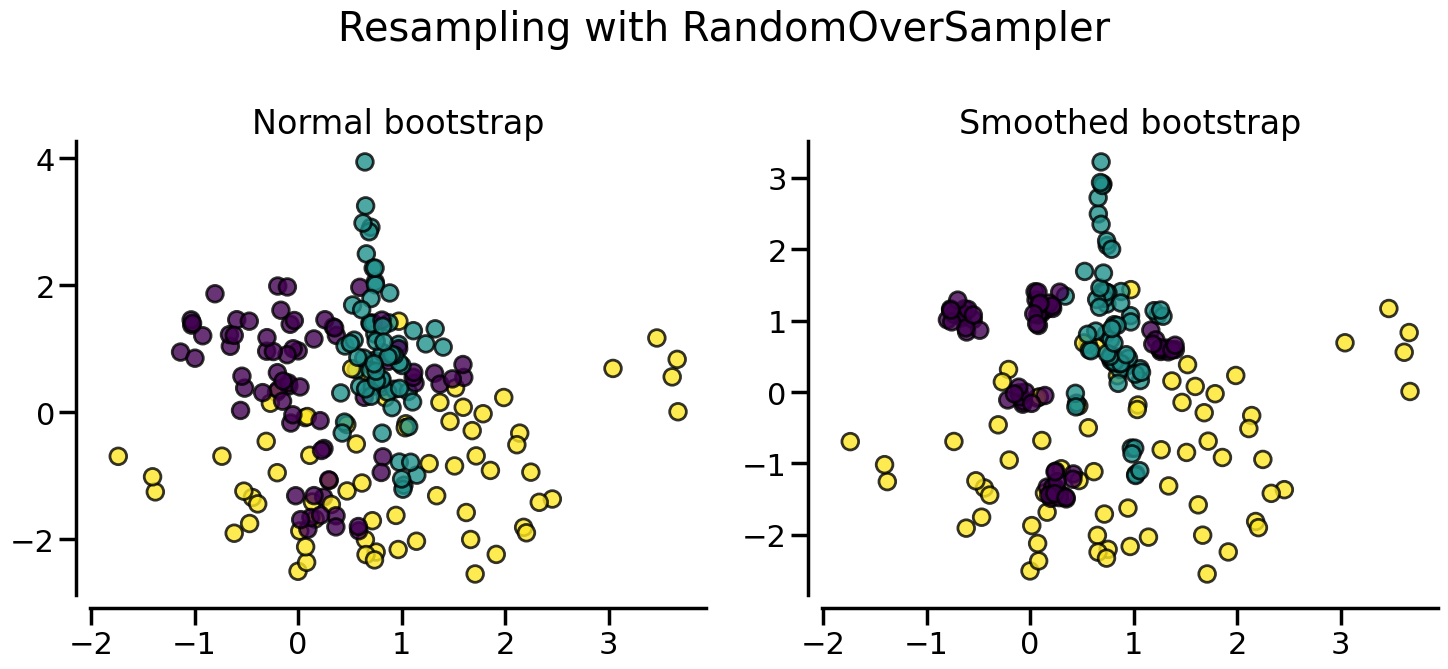

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sampler.set_params(shrinkage=1)
plot_resampling(X, y, sampler, ax=axs[0], title="Normal bootstrap")

sampler.set_params(shrinkage=0.3)
plot_resampling(X, y, sampler, ax=axs[1], title="Smoothed bootstrap")

fig.suptitle(f"Resampling with {sampler.__class__.__name__}")
fig.tight_layout()

# SMOTE

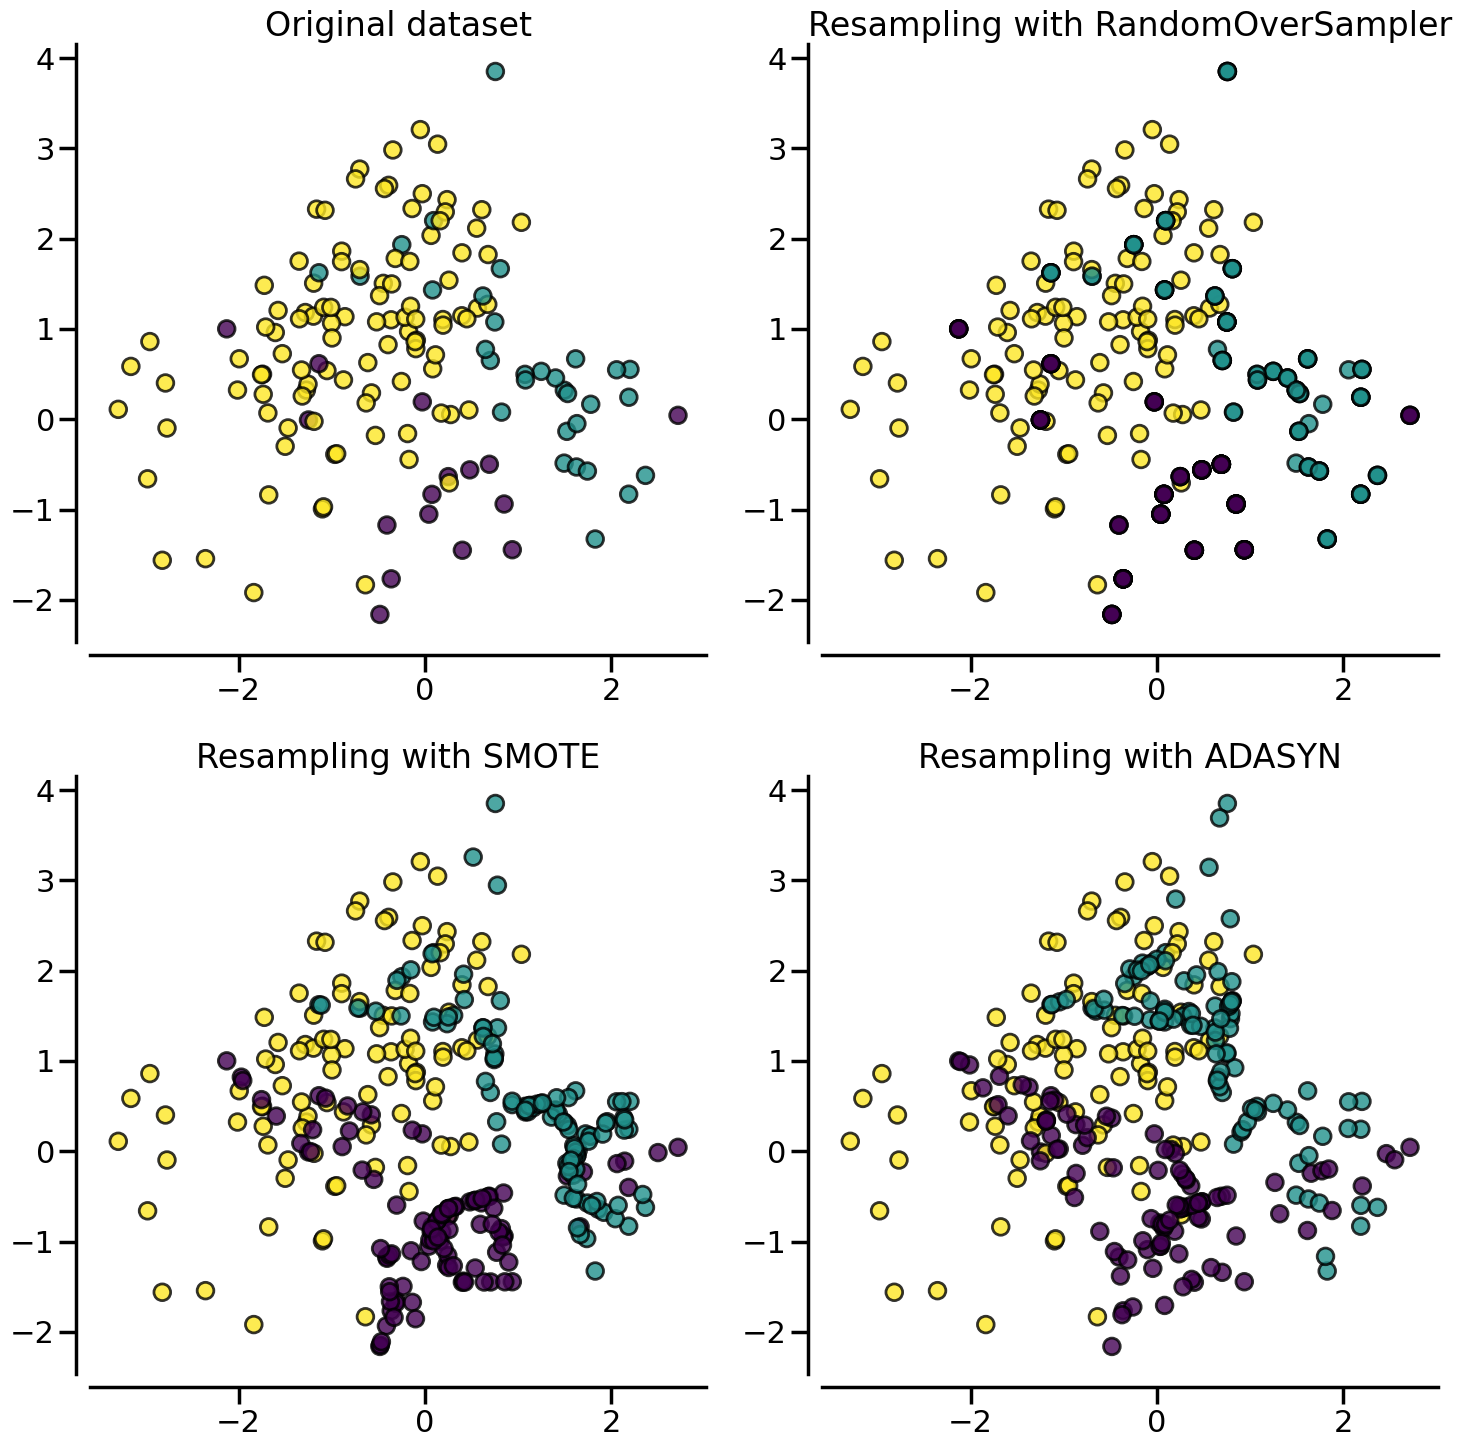

In [6]:
from imblearn import FunctionSampler  # to use a idendity sampler
from imblearn.over_sampling import ADASYN, SMOTE

X, y = create_dataset(n_samples=150, weights=(0.1, 0.2, 0.7))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

samplers = [
    FunctionSampler(),
    RandomOverSampler(random_state=0),
    SMOTE(random_state=0),
    ADASYN(random_state=0),
]

for ax, sampler in zip(axs.ravel(), samplers):
    title = "Original dataset" if isinstance(sampler, FunctionSampler) else None
    plot_resampling(X, y, sampler, ax, title=title)
fig.tight_layout()

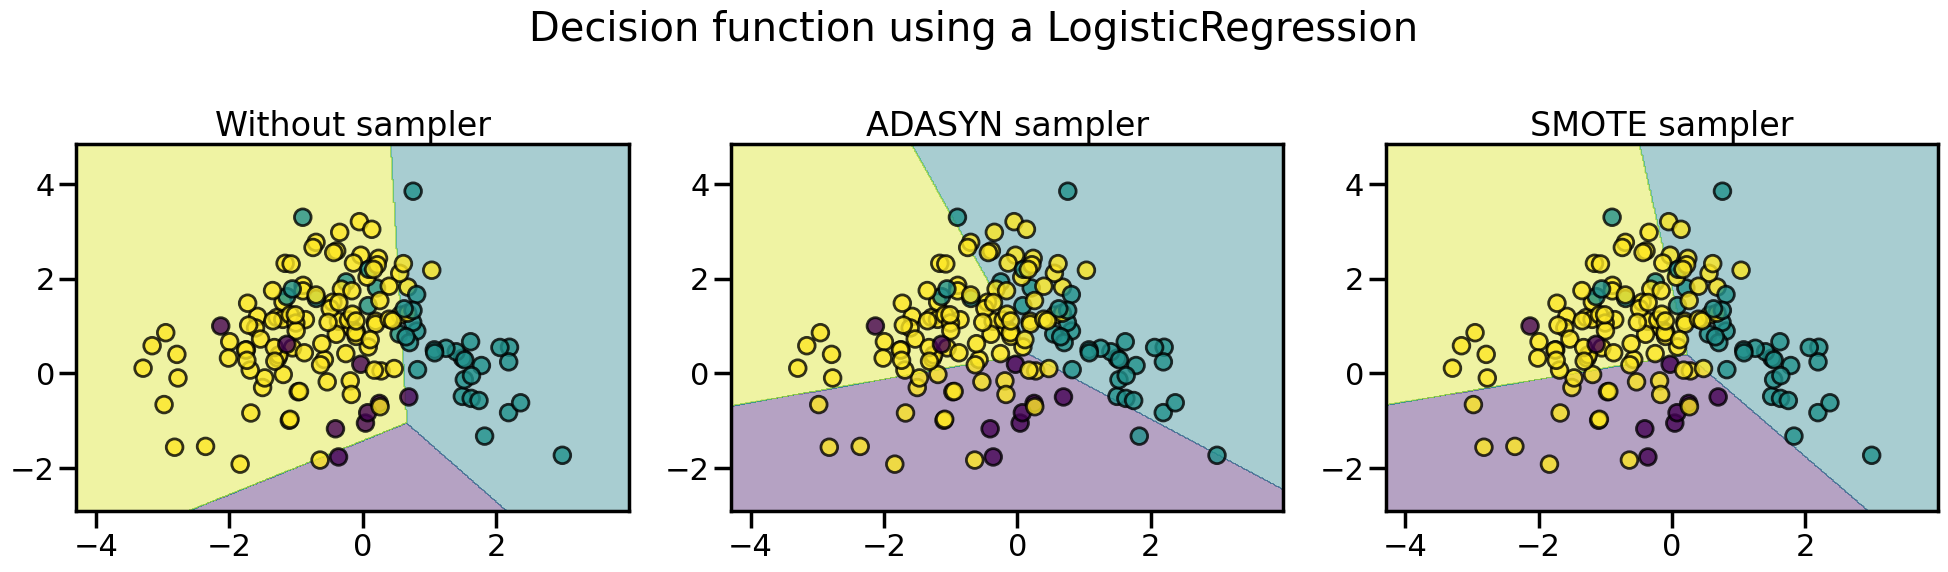

In [7]:
X, y = create_dataset(n_samples=150, weights=(0.05, 0.25, 0.7))

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

models = {
    "Without sampler": clf,
    "ADASYN sampler": make_pipeline(ADASYN(random_state=0), clf),
    "SMOTE sampler": make_pipeline(SMOTE(random_state=0), clf),
}

for ax, (title, model) in zip(axs, models.items()):
    model.fit(X, y)
    plot_decision_function(X, y, model, ax=ax, title=title)

fig.suptitle(f"Decision function using a {clf.__class__.__name__}")
fig.tight_layout()